# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = pd.read_csv('https://raw.githubusercontent.com/ezraattisso/linearModels/refs/heads/main/lab/data/cars_hw.csv')

cars_df = pd.DataFrame(url)

cars_df.head()

# Checking for missing values
print("Missing Values:\n", cars_df.isnull().sum())

# Checking data types
print("\nData Types:\n", cars_df.dtypes)


# Basic summary statistics

In [ ]:
### Q1

# some exploratory plots being done here.

import matplotlib.pyplot as plt
import seaborn as sns

# histogram

cars_df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.show()


# pairplot

sns.pairplot(cars_df)
plt.show()

# boxplot

plt.figure(figsize=(12, 6))
sns.boxplot(data=cars_df, orient='h')
plt.title("Boxplots of Numeric Features")
plt.show()



In [ ]:
### Q2

# checking which columns are categorical here, and then using them in hot encoding.

categorical_cols = cars_df.select_dtypes(include=['object']).columns
print("Categorical Columns:\n", categorical_cols)

cars_df_encoded = pd.get_dummies(cars_df, columns=categorical_cols, drop_first=True)

print(cars_df_encoded.head())


In [16]:
### Q3

from sklearn.model_selection import train_test_split

# Here I'm defining features as X and my target variable as y
X = cars_df_encoded.drop(columns=['Mileage_Run'])
y = cars_df_encoded['Price']

# I'm splitting the data into the 80/20% for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifying the split
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 780 samples
Test set size: 196 samples


In [18]:
### Q4

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


X = cars_df_encoded[['Mileage_Run']]  # Predictor variable
y = cars_df_encoded['Price']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and Fitting model
model = LinearRegression()
model.fit(X_train, y_train)

# these are my predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Ccalculating rmse here
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# calculating R^2 here
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


print(f"Training RMSE: {rmse_train:.2f}, Training R^2: {r2_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}, Test R^2: {r2_test:.2f}")

Training RMSE: 369437.23, Training R^2: 0.02
Test RMSE: 330349.98, Test R^2: 0.05


KeyError: "['Price'] not found in axis"

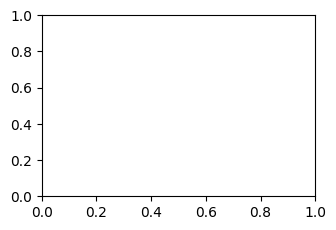

In [23]:
### Q5

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Prepare data for statsmodels
X = cars_df_encoded.drop(columns=['Price'])  # Features
y = cars_df_encoded['Price']  # Target

# Add constant for the intercept
X = sm.add_constant(X)  # This adds an intercept (constant) to the model

# Create partial regression plots
fig = plt.figure(figsize=(12, 8))

for i, var in enumerate(X.columns, 1):
    if var != 'Price' and var != 'const':  # Exclude target variable and constant
        ax = fig.add_subplot(3, 3, i)  # Adjust grid size if needed
        sm.graphics.plot_partregress("Price", var, exog_others=X.drop(columns=[var, 'Price']),
                                     data=cars_df_encoded, ax=ax, obs_labels=False)
        plt.title(f"Partial Plot: {var} vs Price")

plt.tight_layout()
plt.show()